In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
808,2020-06-28,United Kingdom,310830.0,310250.0,43608.0,43514.0,580.0,94.0
809,2020-06-28,Germany,193779.0,193499.0,8982.0,8957.0,280.0,25.0
810,2020-06-28,Iran,220713.0,220180.0,10266.0,10364.0,533.0,-98.0
811,2020-06-28,Turkey,195857.0,195883.0,5085.0,5082.0,-26.0,3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2488.268142681427
RMSE =  5887.418718633124


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  321.38253382533827
RMSE =  734.605025619507


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  12501.4125
RMSE =  15667.908023648211
-- World performances for deaths --
MAPE =  1608.0625
RMSE =  1963.9486532239075


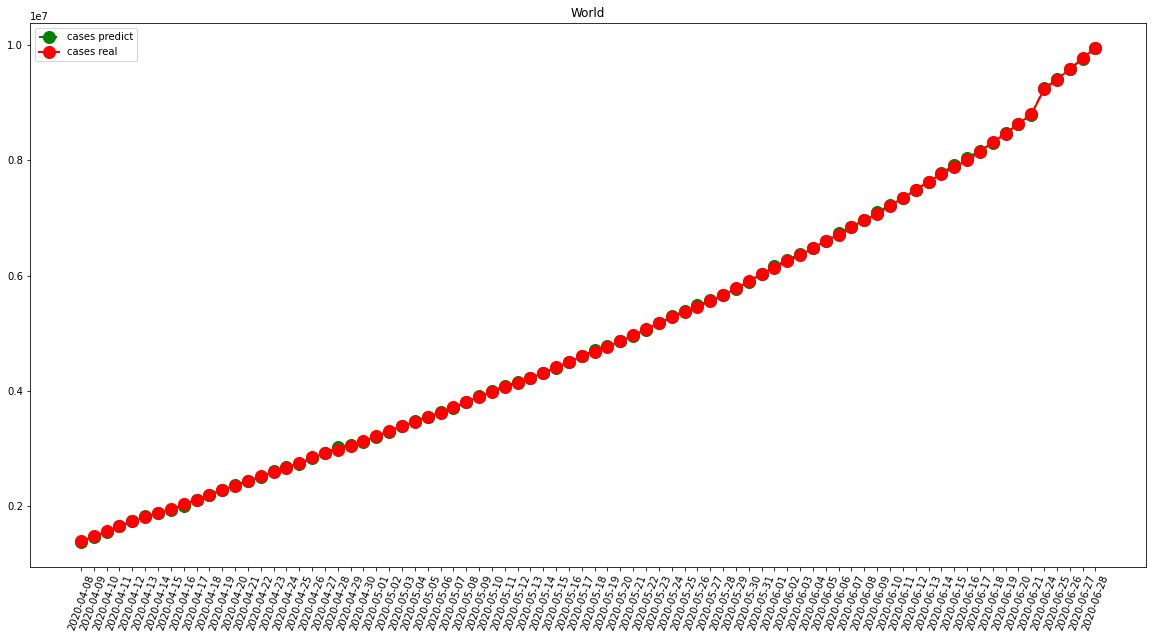

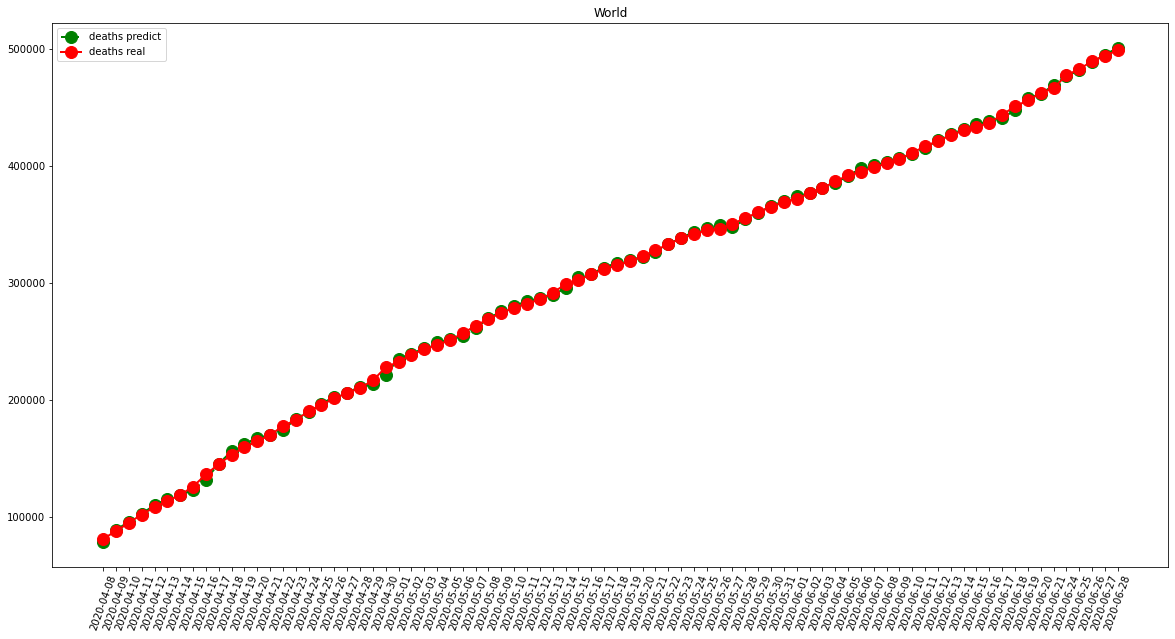

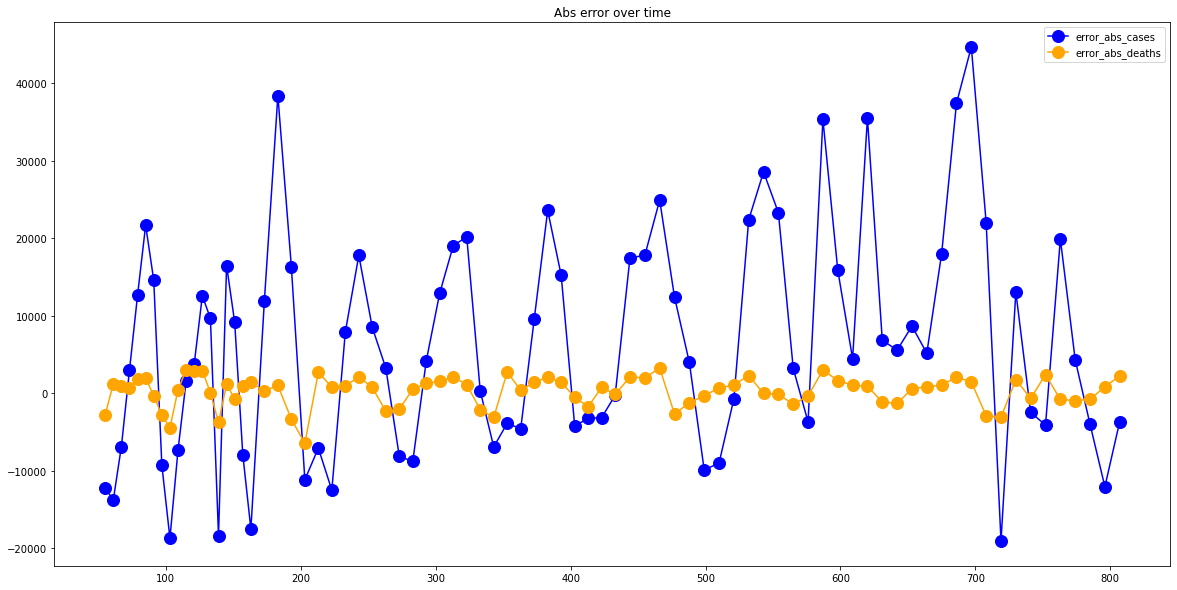

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  903.7555555555556
RMSE =  1504.7384047290966
-- France performances for deaths --
MAPE =  194.23333333333332
RMSE =  353.01232273109105


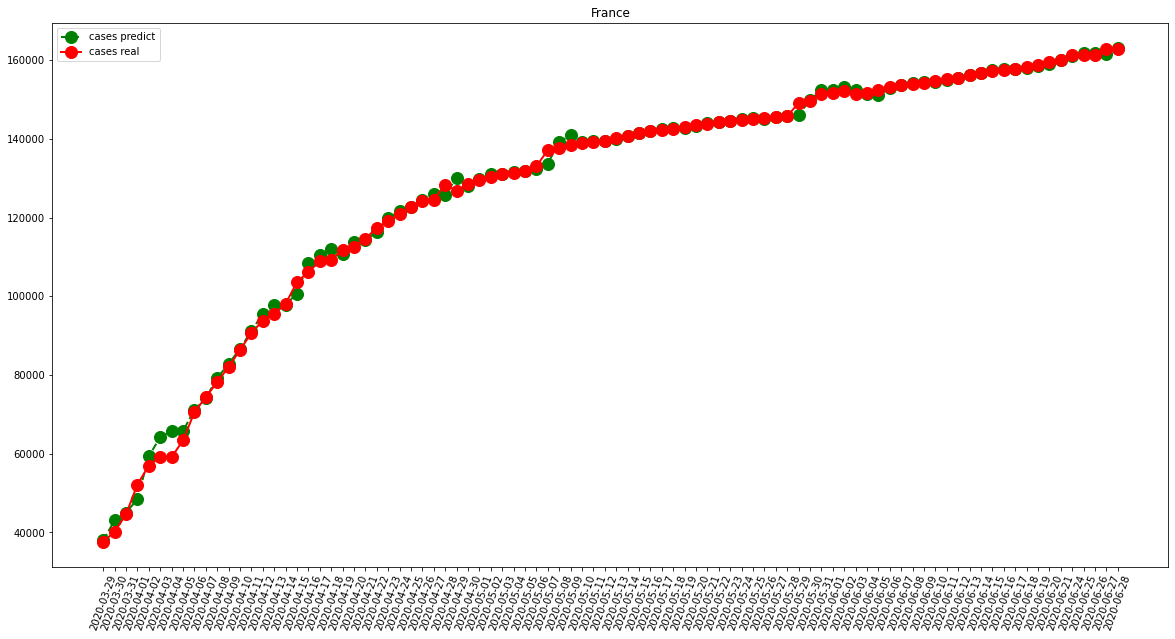

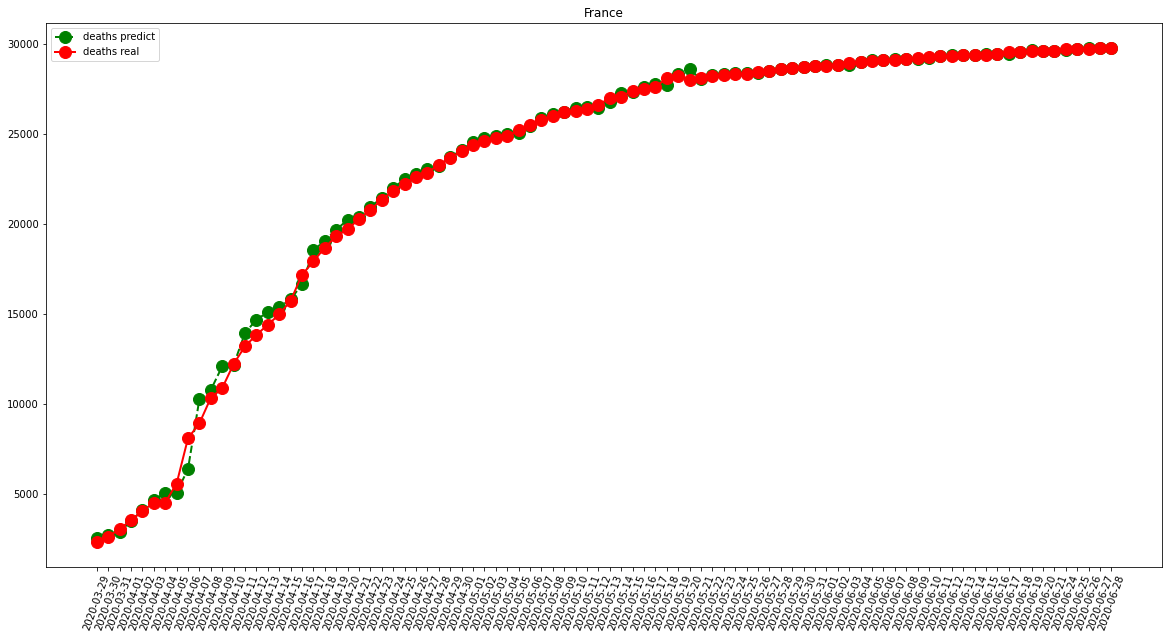

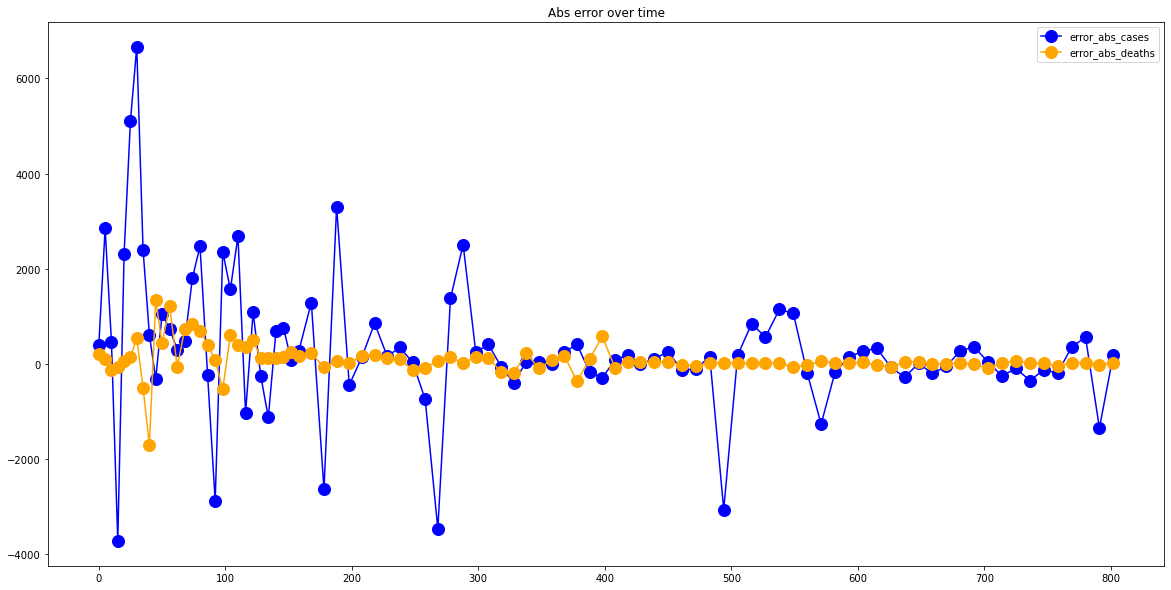

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  397.6777777777778
RMSE =  569.6301431630878
-- Italy performances for deaths --
MAPE =  105.56666666666666
RMSE =  311.6011874175065


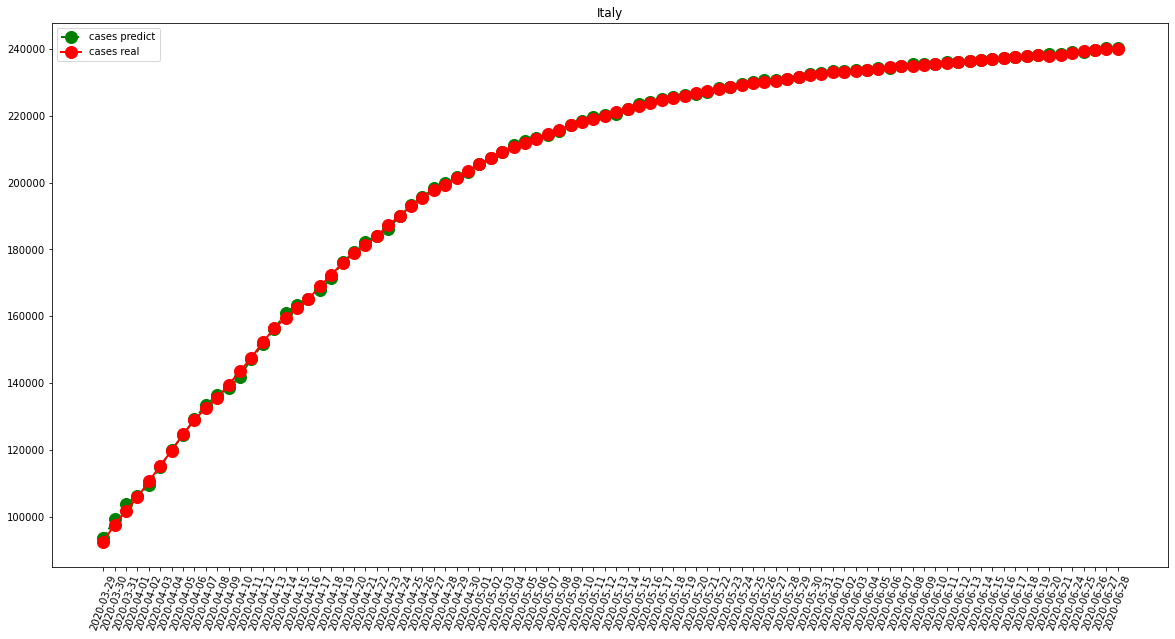

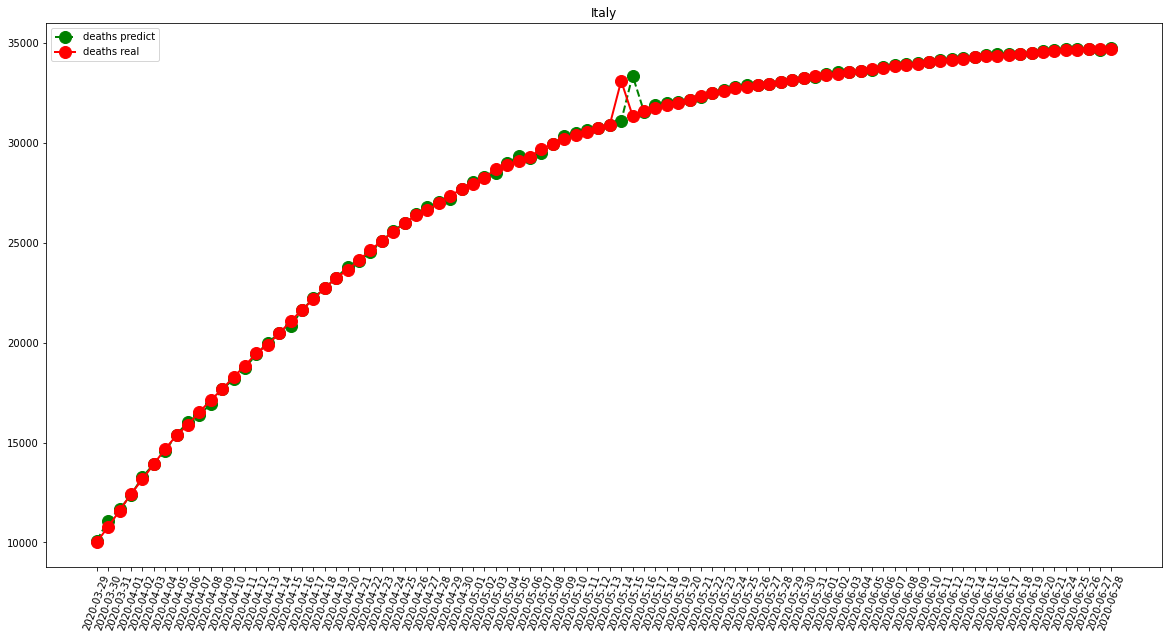

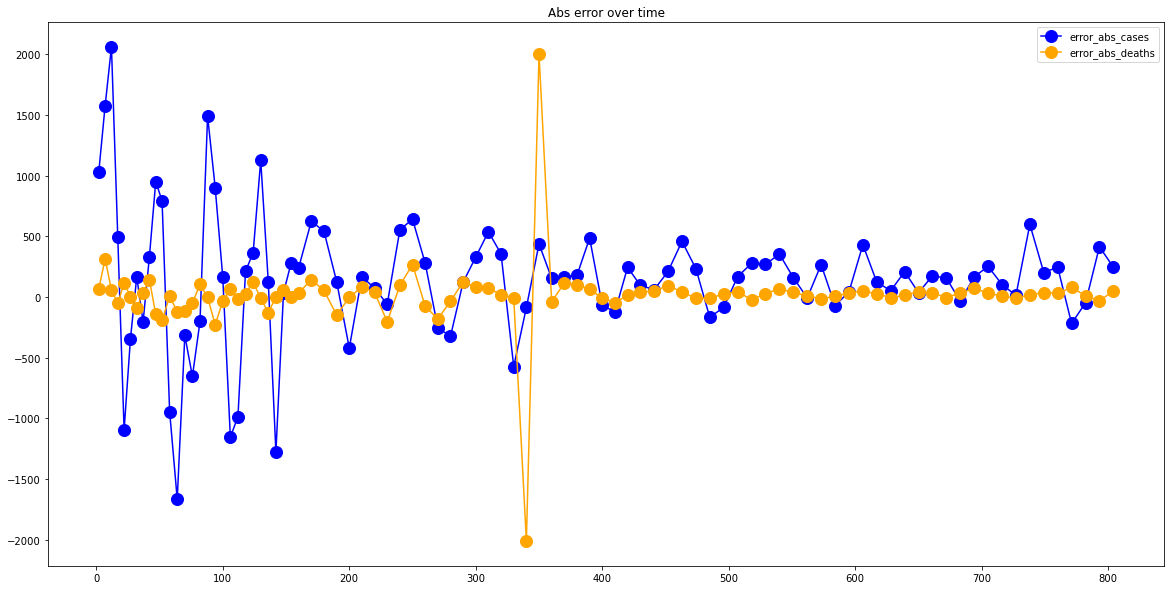

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  911.9333333333333
RMSE =  2153.8414261242374
-- Spain performances for deaths --
MAPE =  199.9
RMSE =  427.8043815681285


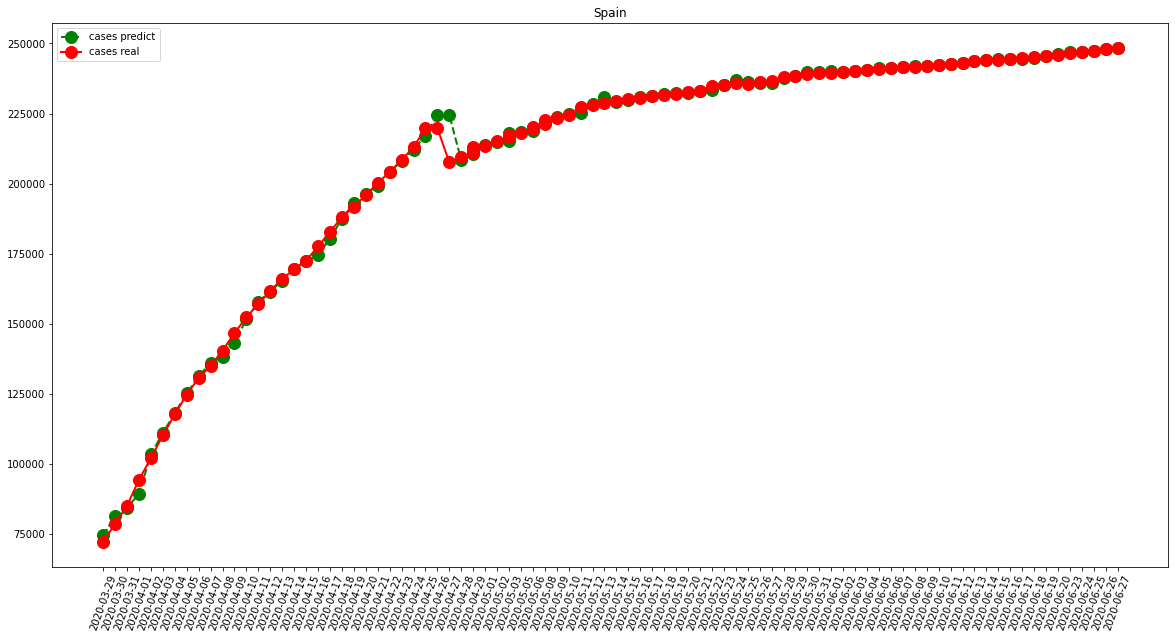

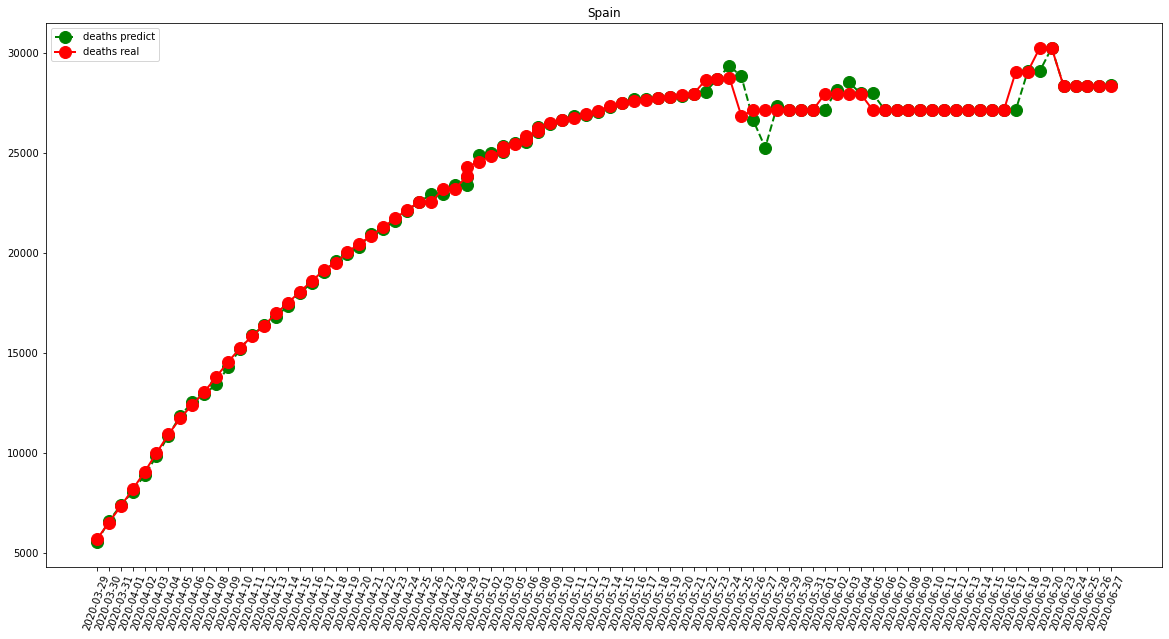

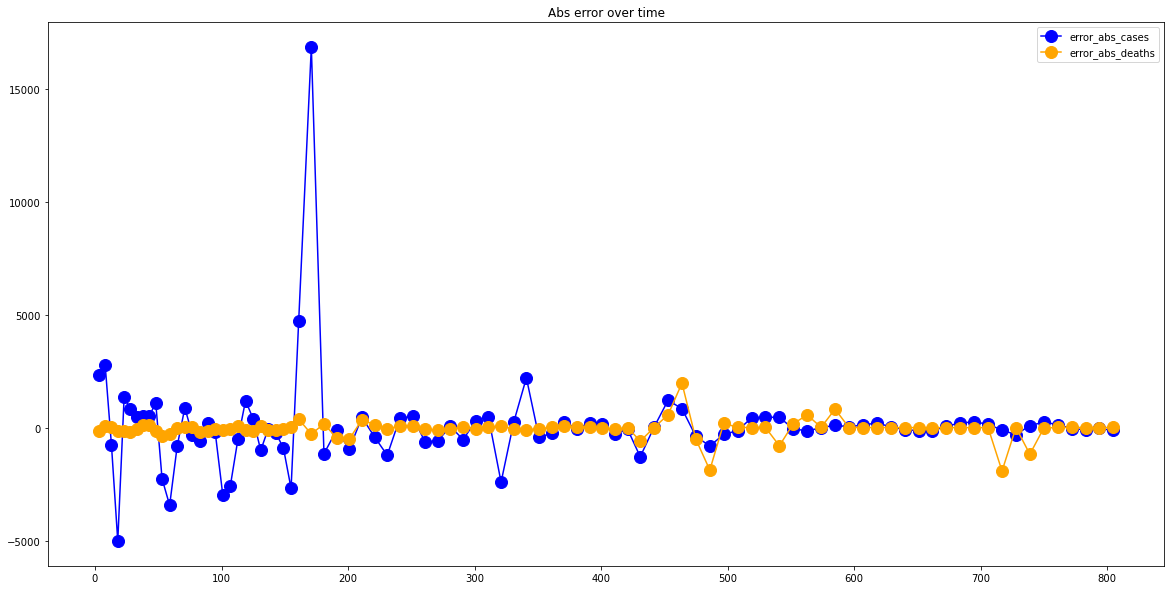

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4721.7555555555555
RMSE =  6524.17675862463
-- United States performances for deaths --
MAPE =  547.8666666666667
RMSE =  807.0263660845013


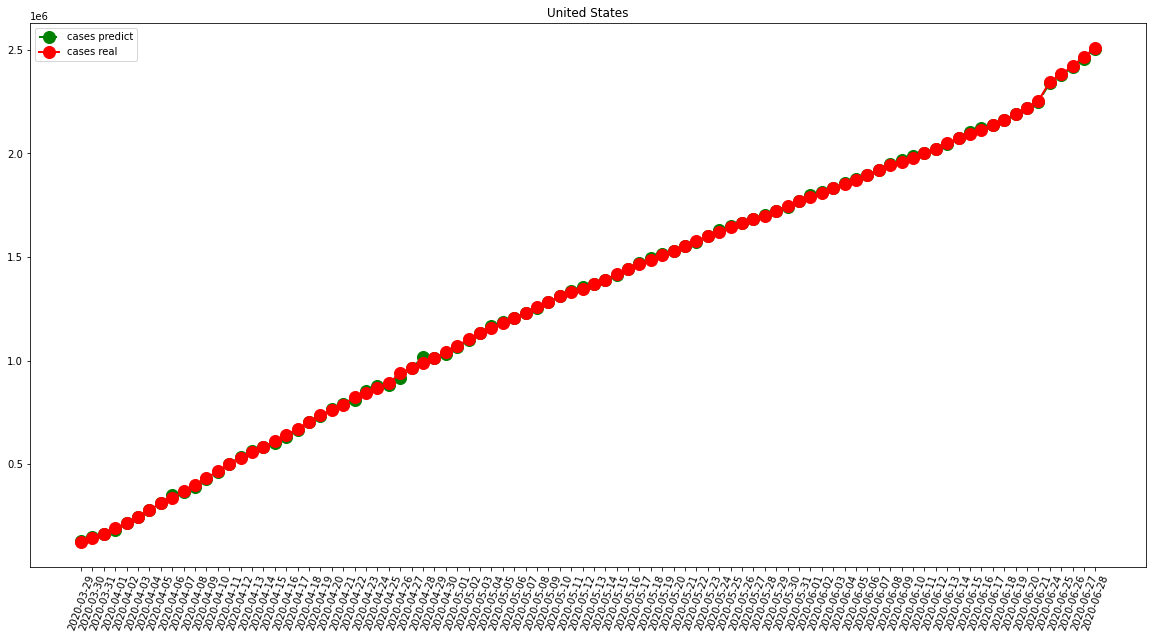

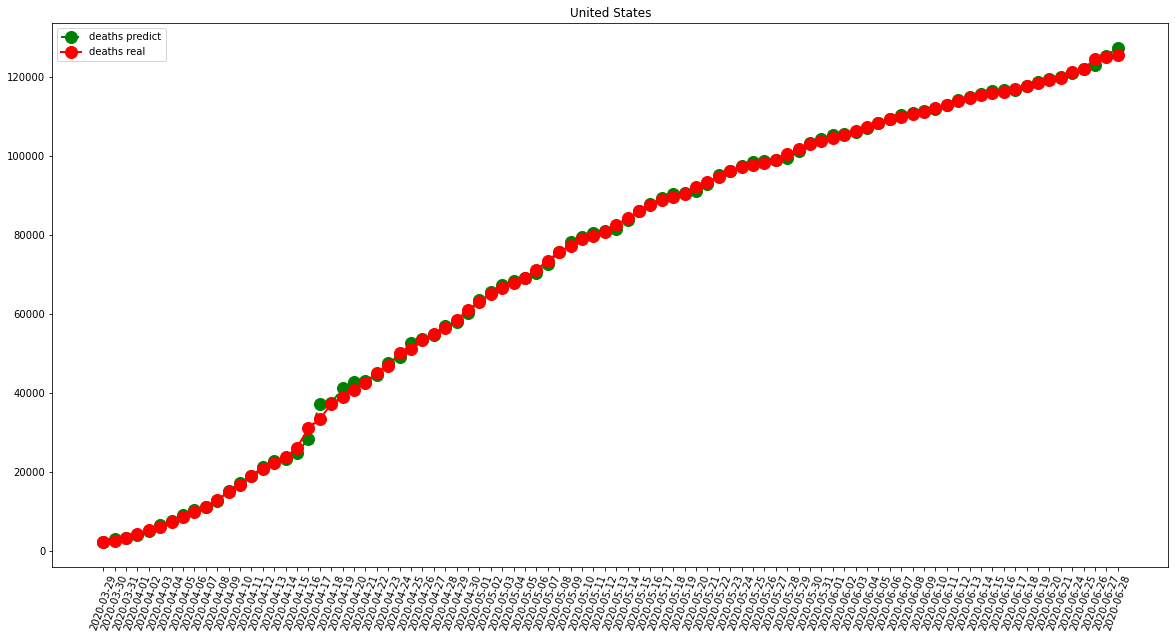

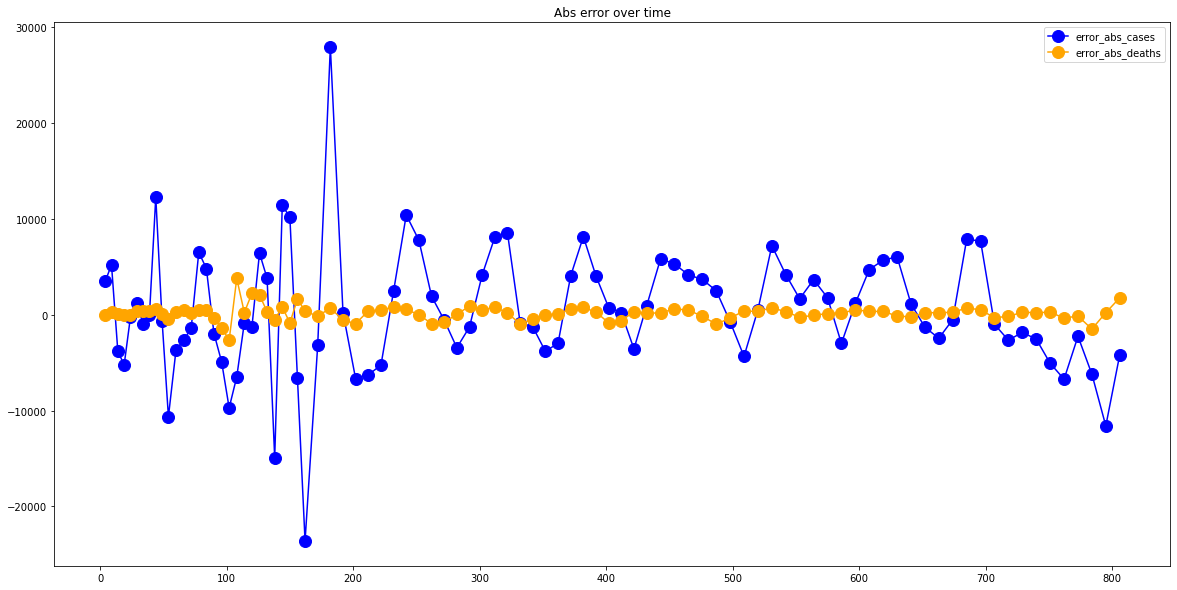

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  95.06666666666666
RMSE =  123.6126566694887
-- China performances for deaths --
MAPE =  41.6
RMSE =  165.40818198223045


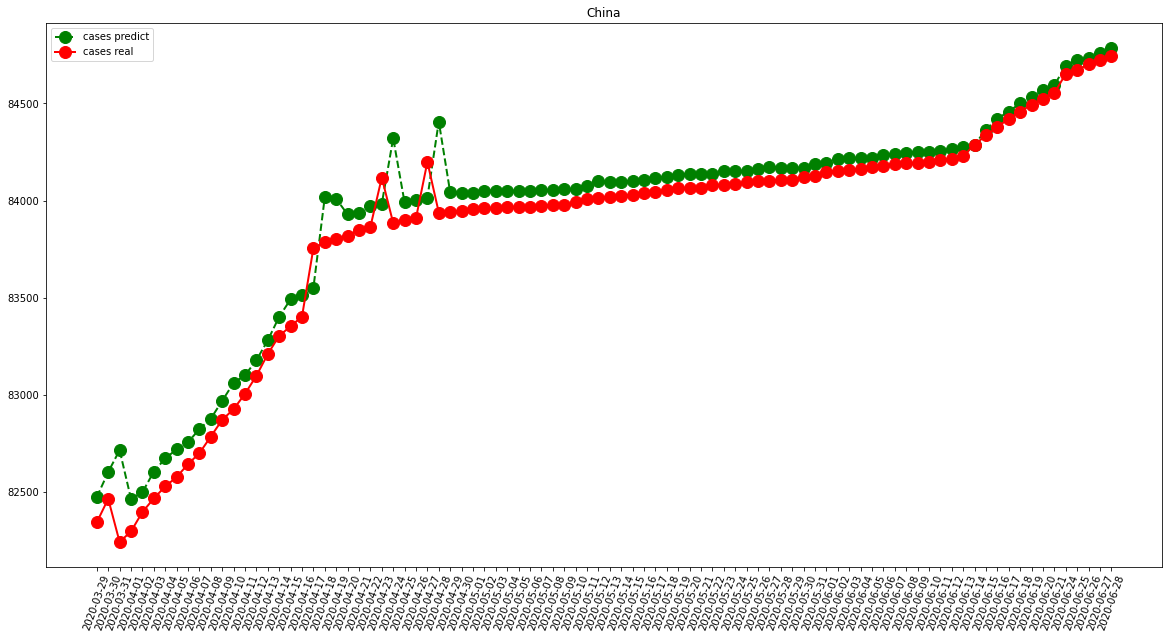

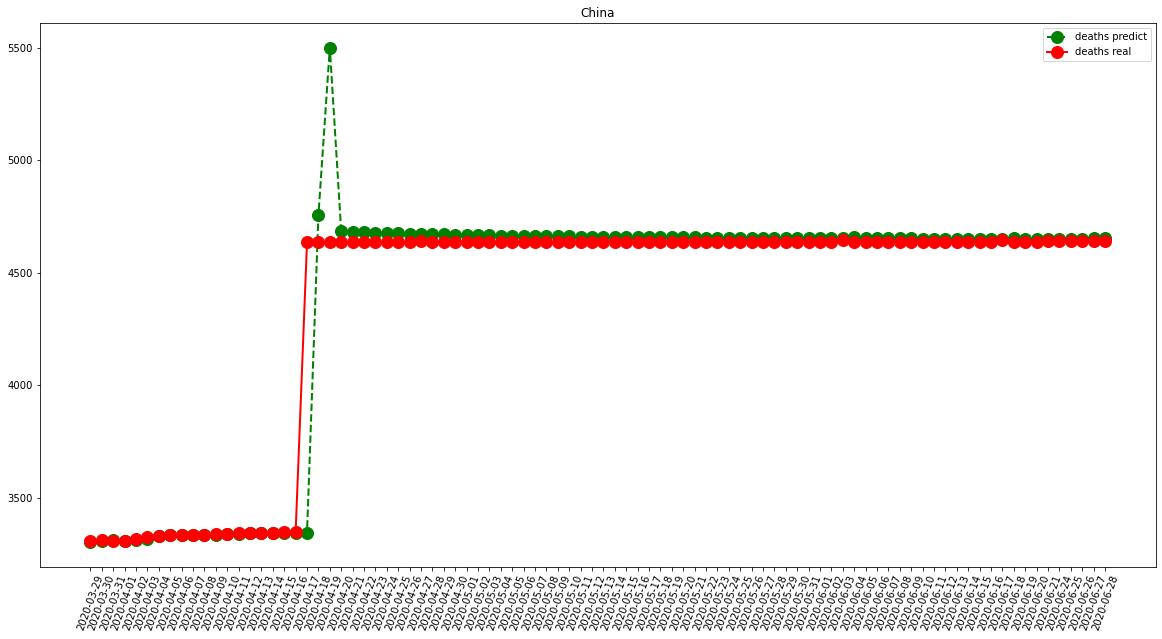

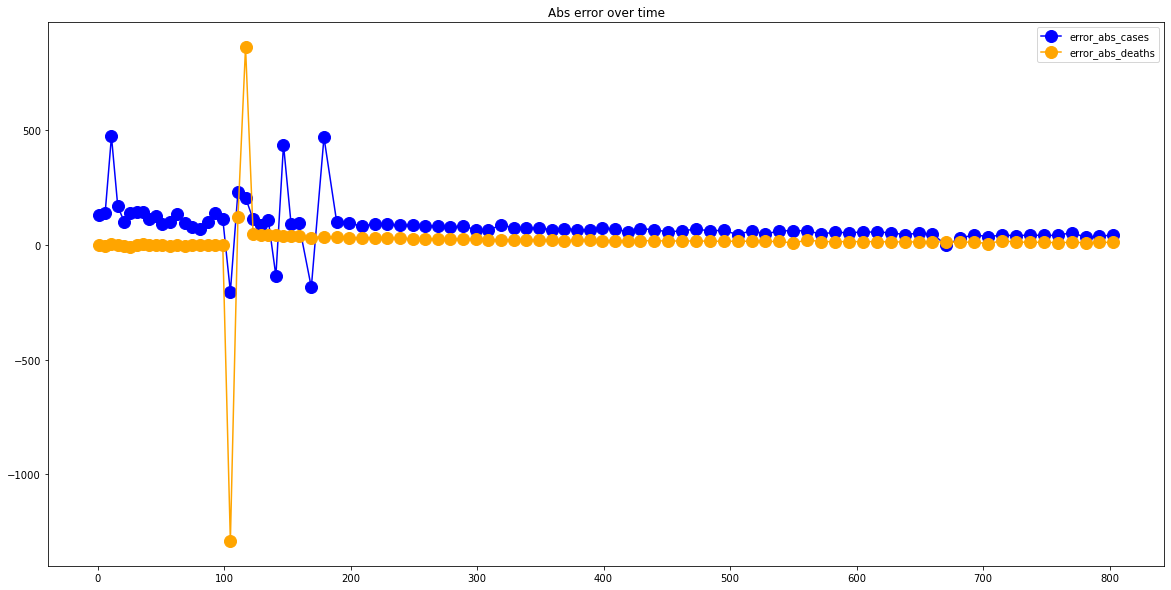

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  854.6612903225806
RMSE =  1190.4873019604333
-- United Kingdom performances for deaths --
MAPE =  266.0967741935484
RMSE =  619.4965698048699


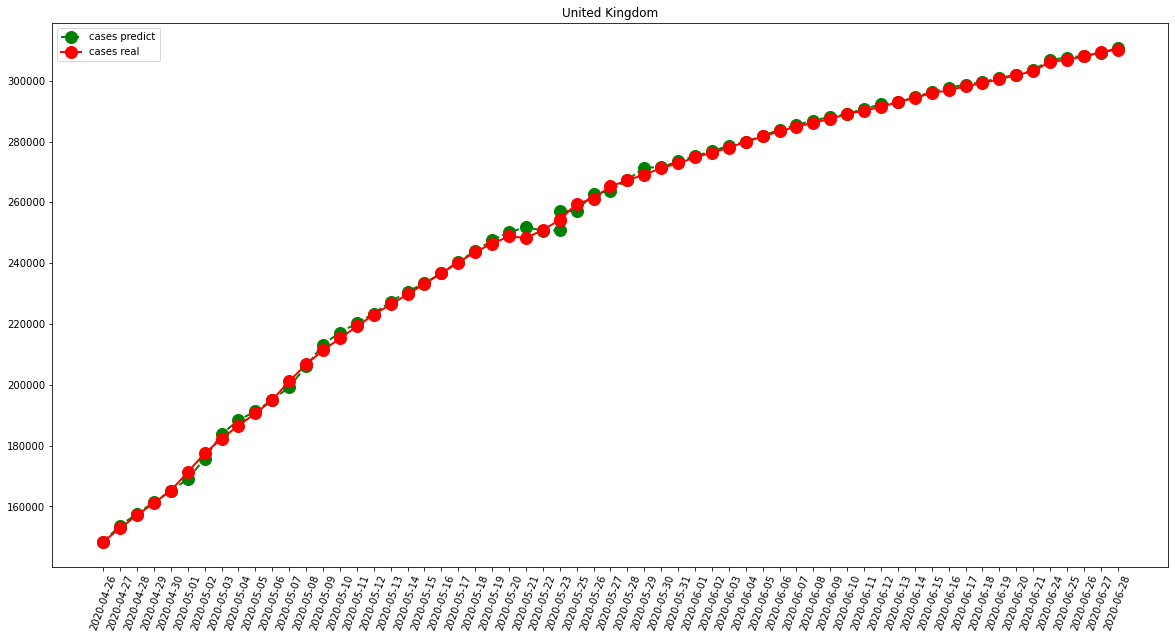

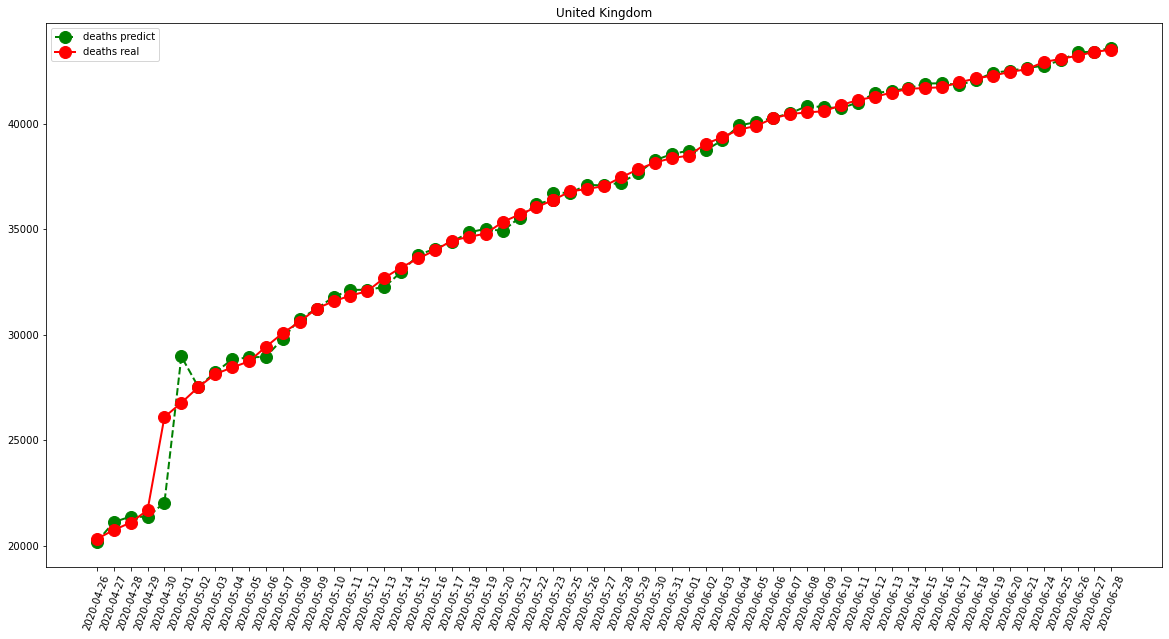

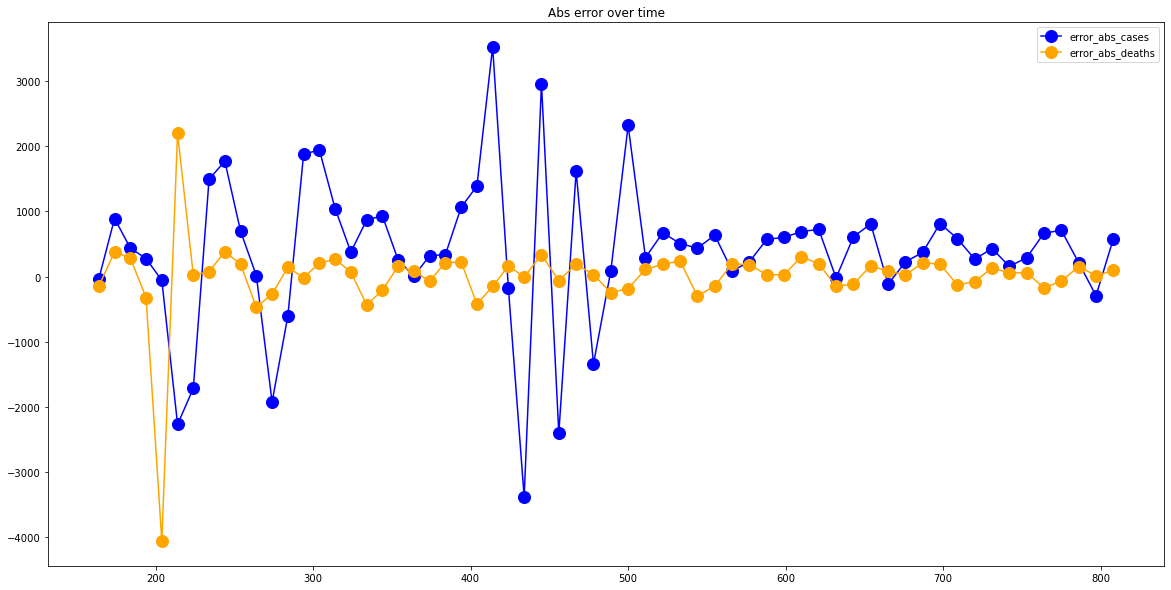

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  316.61290322580646
RMSE =  454.4345653595778
-- Germany performances for deaths --
MAPE =  34.596774193548384
RMSE =  55.05085625304613


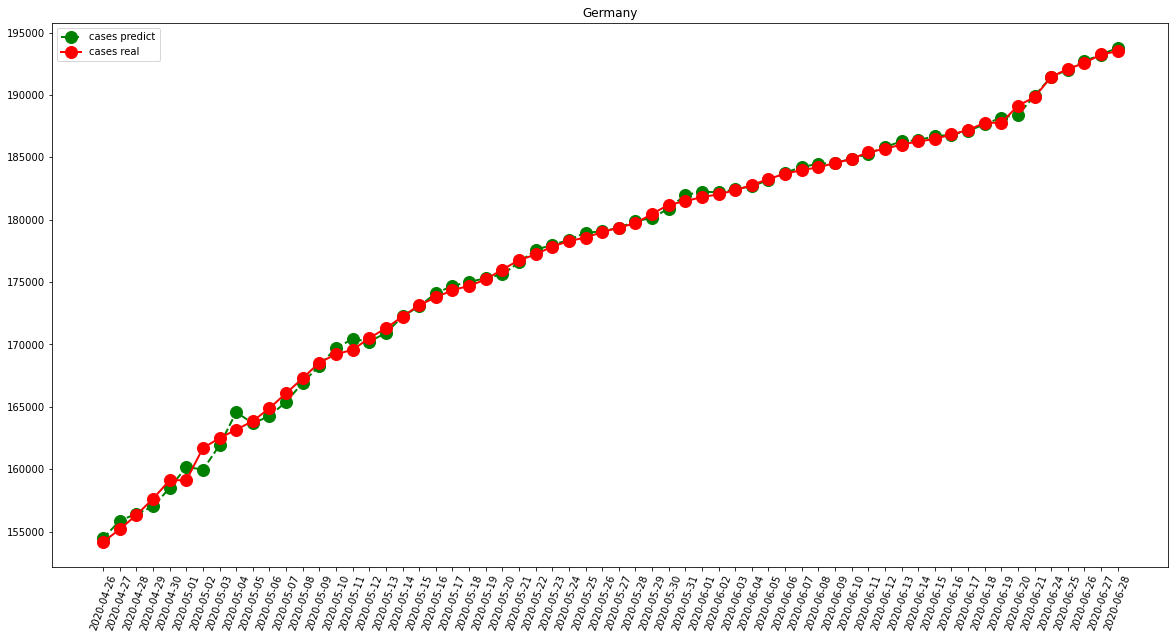

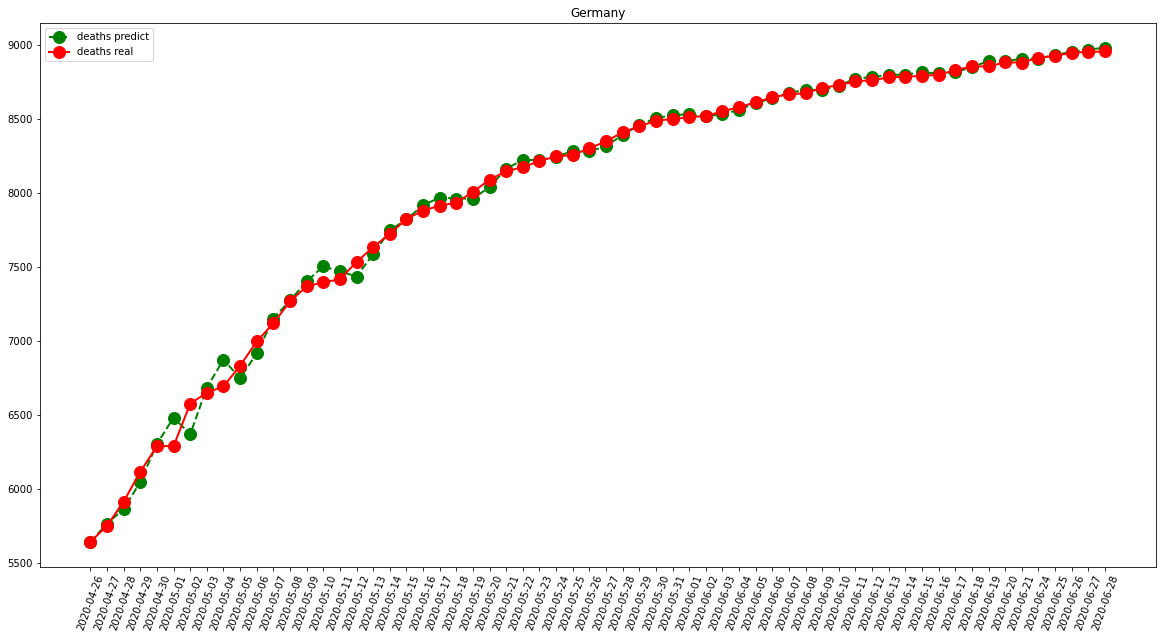

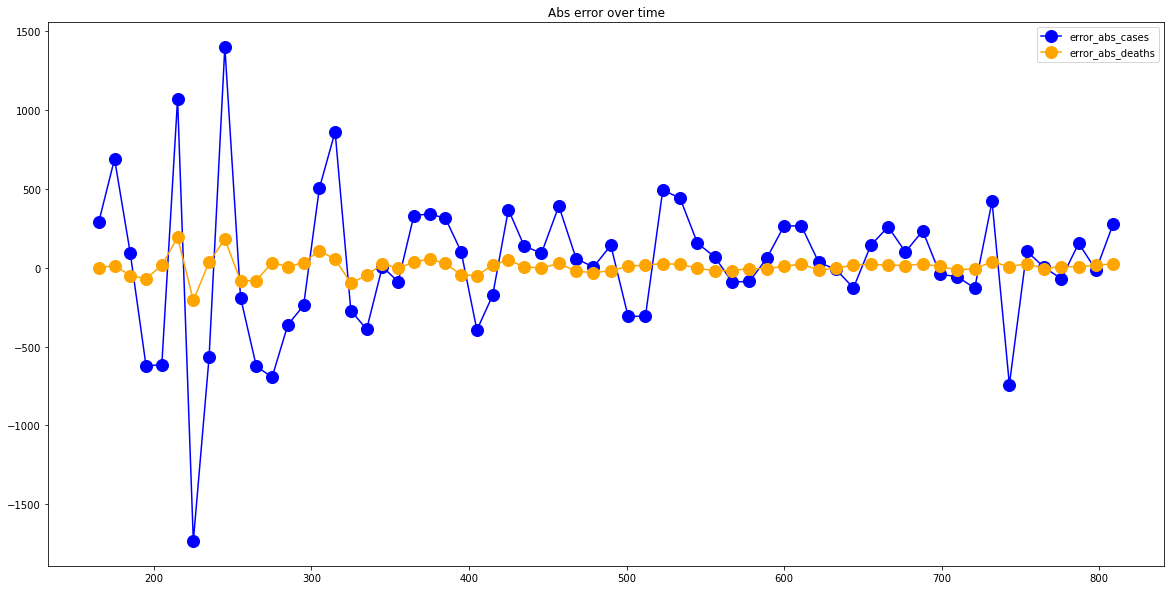

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  256.16129032258067
RMSE =  335.14845049763807
-- Iran performances for deaths --
MAPE =  16.048387096774192
RMSE =  25.513121228863977


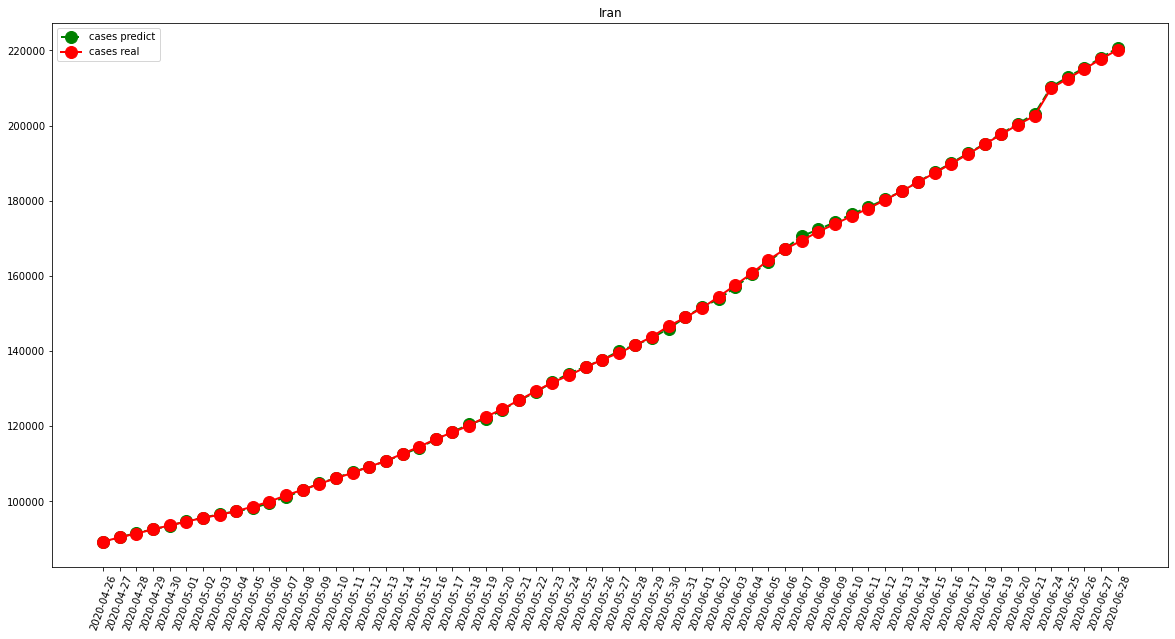

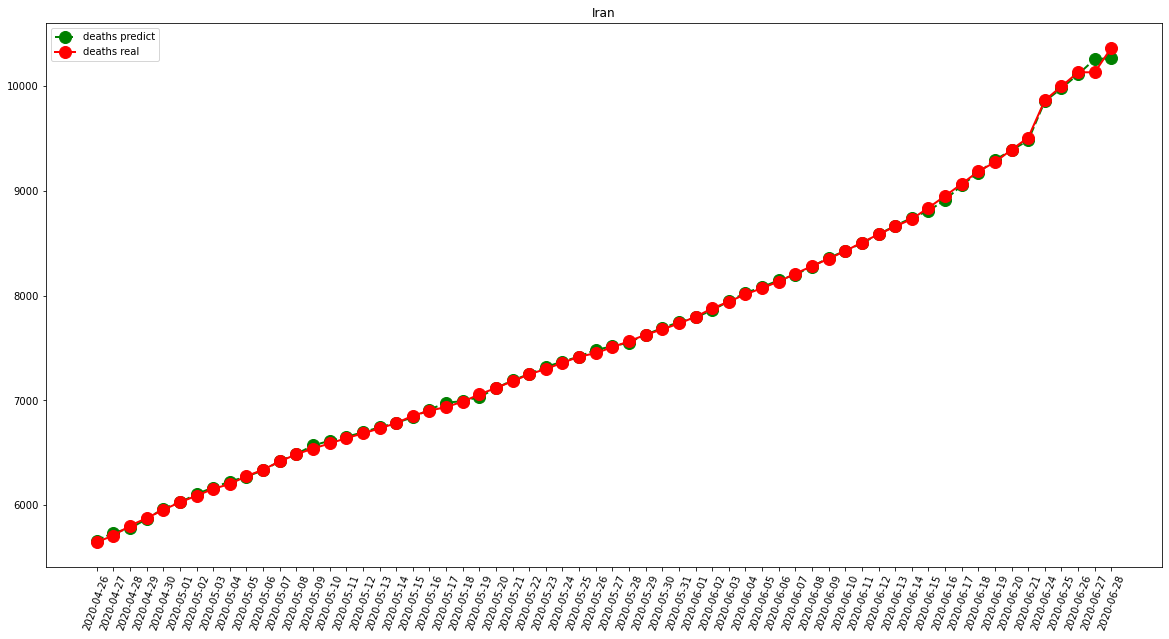

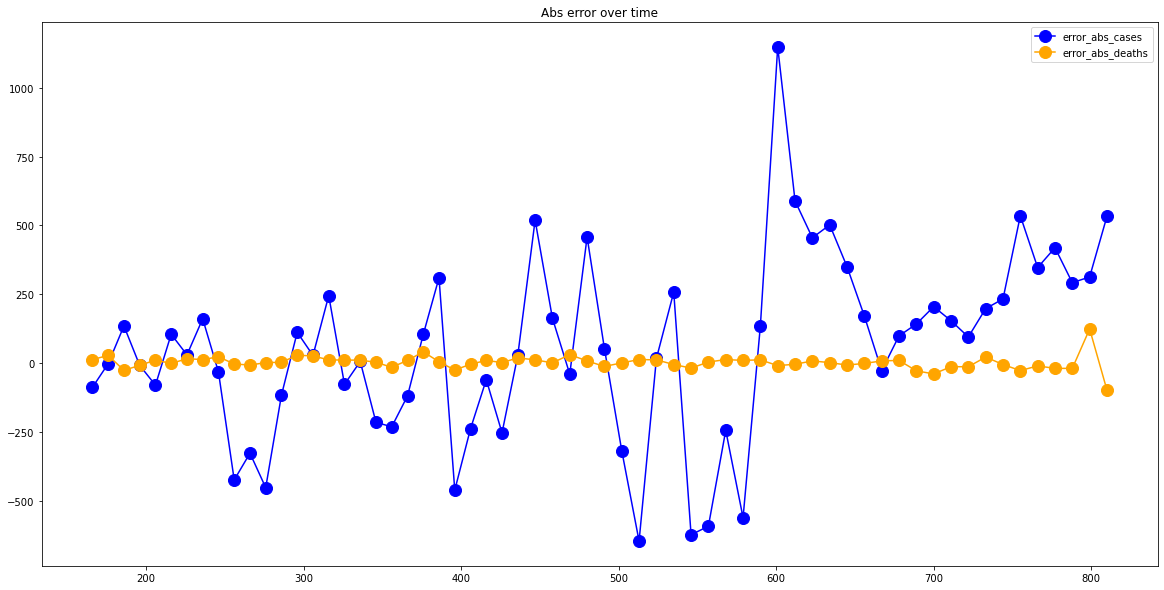

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  293.16129032258067
RMSE =  435.50930511150926
-- Turkey performances for deaths --
MAPE =  29.338709677419356
RMSE =  128.9043781633402


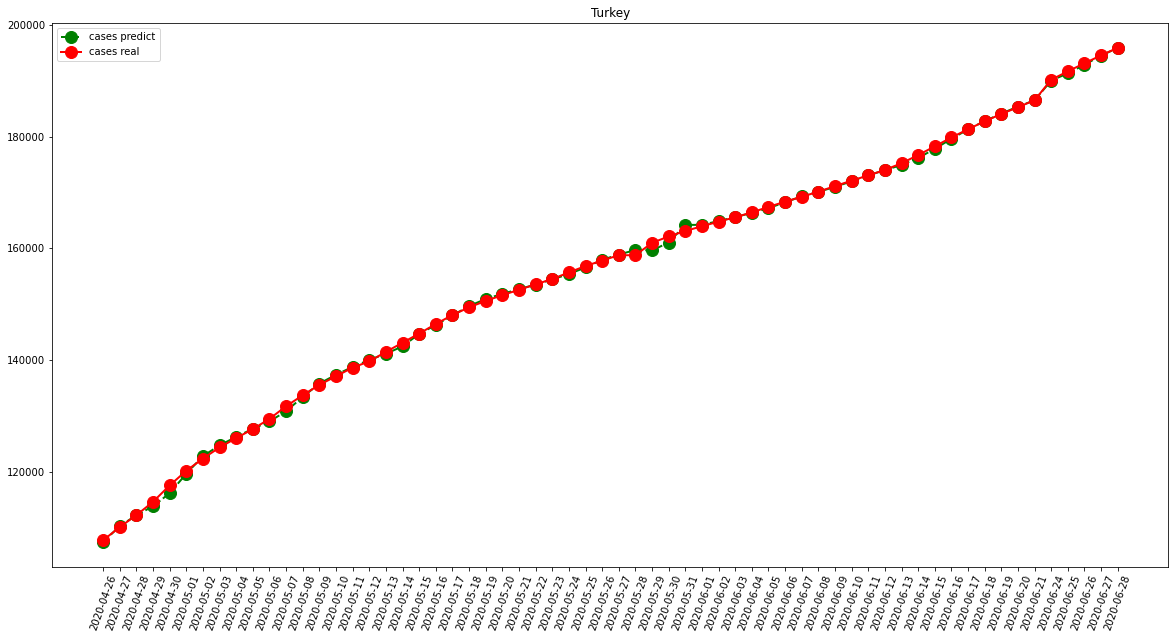

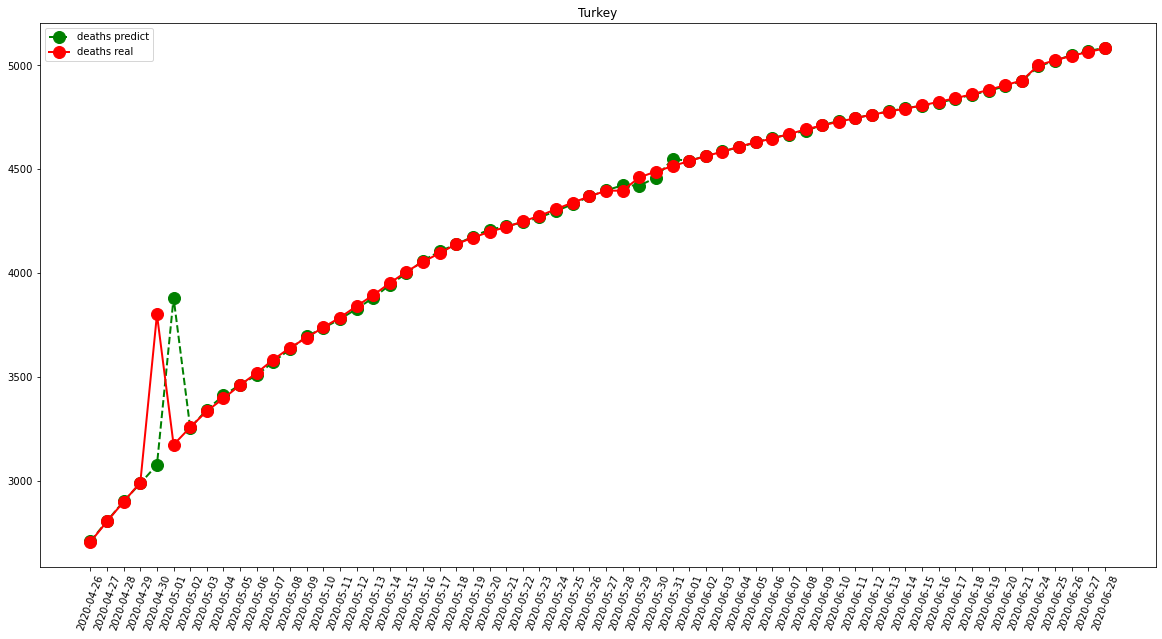

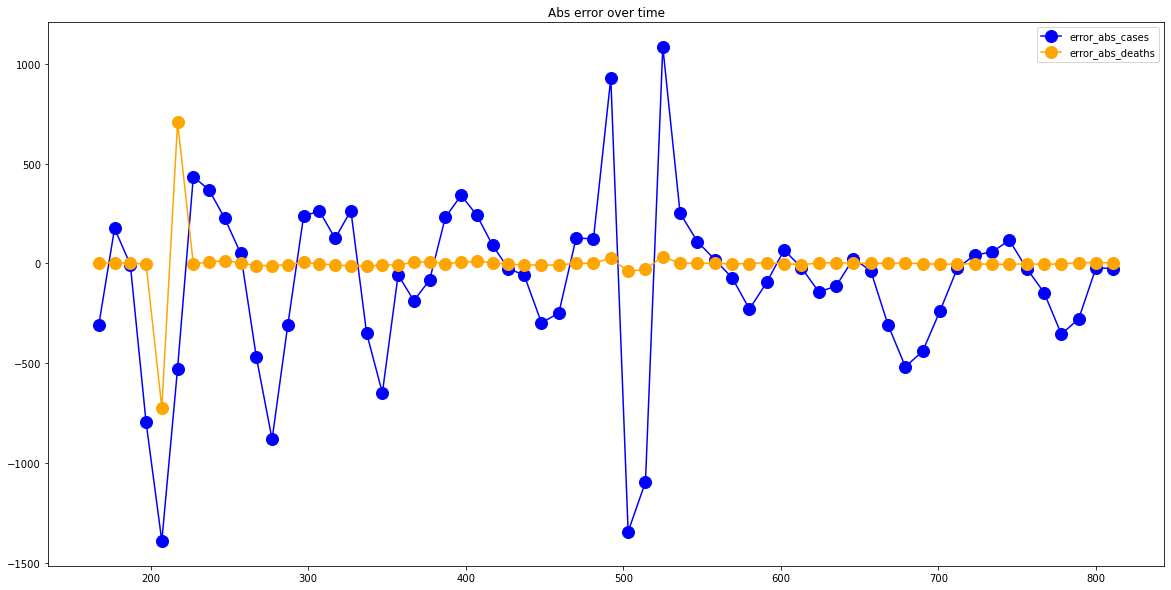

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8098.714285714285
RMSE =  10608.870540394822
-- Brazil performances for deaths --
MAPE =  375.9142857142857
RMSE =  466.1881594377961


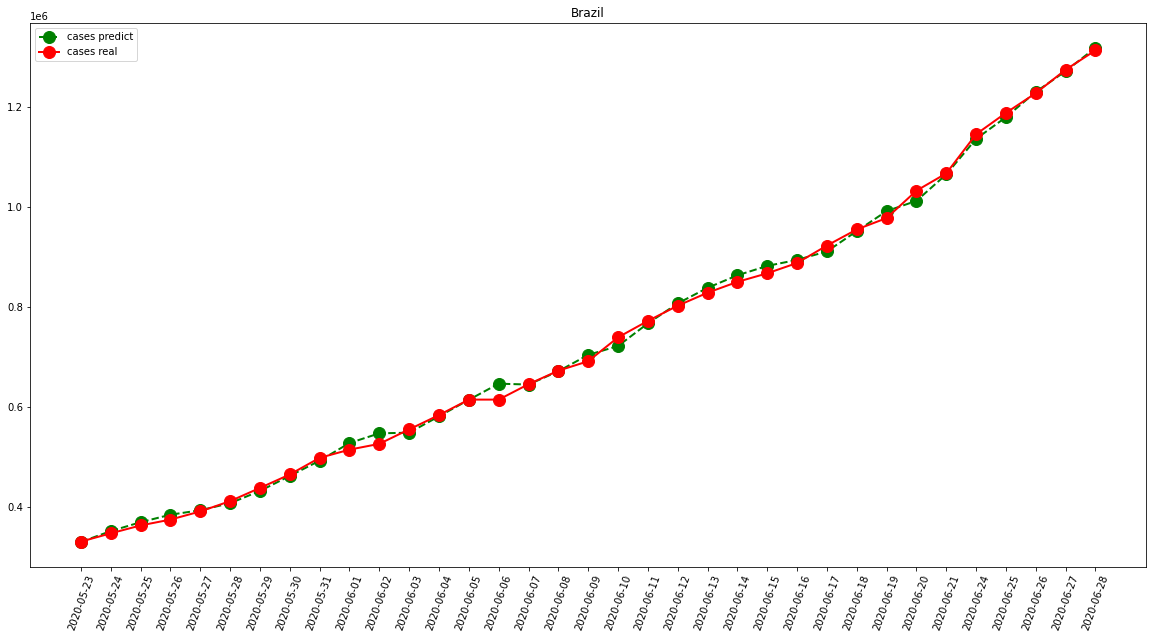

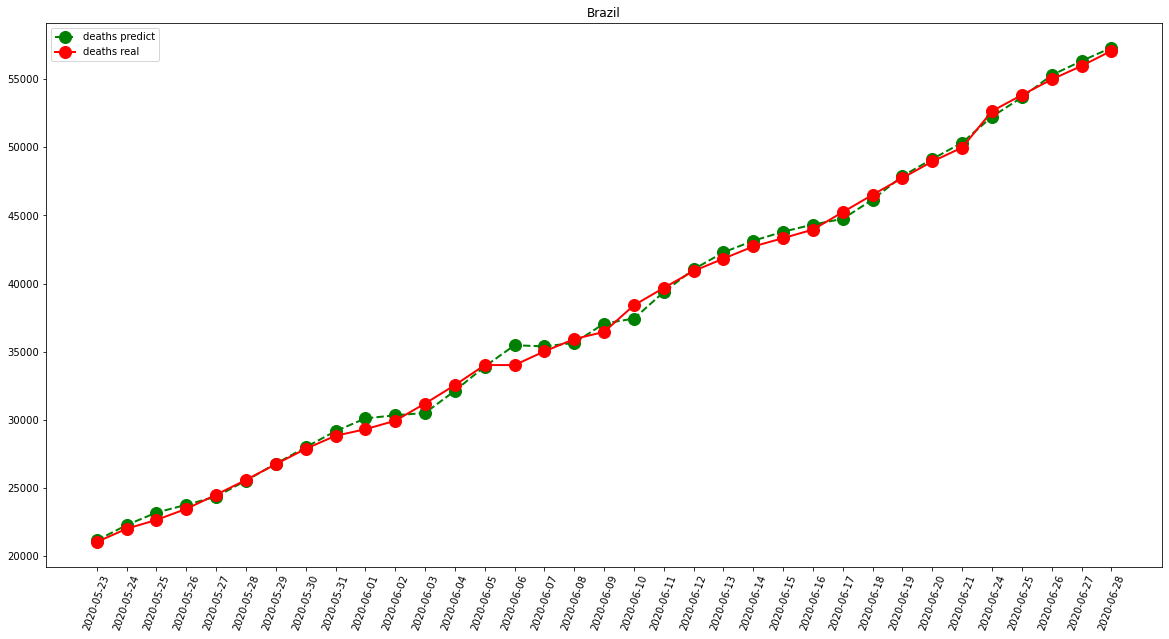

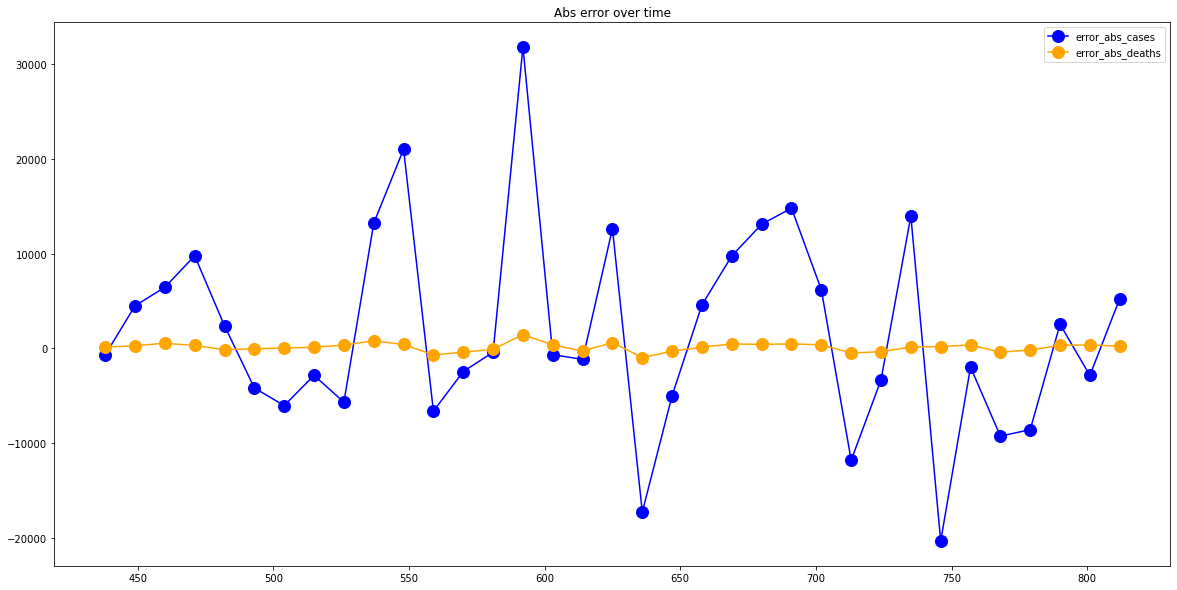

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)